In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt


In [36]:
def fetch_bond_etf_data(ticker, start_date, end_date):
    """
    Fetches historical data for a bond ETF.

    :param ticker: Ticker symbol for the bond ETF.
    :param start_date: Start date for the data.
    :param end_date: End date for the data.
    :return: DataFrame with historical data.
    """
    
    
    data = yf.download(ticker, start=start_date, end=end_date)
    if 'Dividends' not in data.columns:
        data['Dividends'] = 0.0  # Add a Dividends column if it does not exist
    return data
    

# Example tickers for different bond ETFs representing various maturities
bond_etf_tickers = ['SHY', 'IEI', 'TLT']  # Short, Intermediate, Long-term bond ETFs
bond_etf_data = {ticker: fetch_bond_etf_data(ticker, '2019-01-01', '2023-01-01') for ticker in bond_etf_tickers}


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


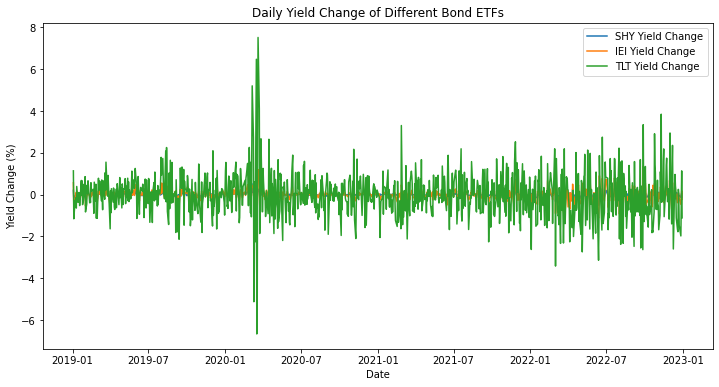

In [37]:
# Assuming the 'Close' price of ETFs as a proxy for bond prices
def plot_yield_trends(bond_data):
    plt.figure(figsize=(12, 6))
    for ticker, data in bond_data.items():
        # Calculate daily yield change as a simple proxy (actual yield calculations are more complex)
        daily_yield_change = data['Close'].pct_change() * 100  # Percentage change
        plt.plot(daily_yield_change, label=f'{ticker} Yield Change')

    plt.title('Daily Yield Change of Different Bond ETFs')
    plt.xlabel('Date')
    plt.ylabel('Yield Change (%)')
    plt.legend()
    plt.show()

plot_yield_trends(bond_etf_data)


In [38]:
def basic_bond_market_analysis(bond_data):
    analysis_results = {}
    for ticker, data in bond_data.items():
        analysis_results[ticker] = {
            'Average Price': data['Close'].mean(),
            'Price Volatility': data['Close'].std(),
            'Max Price': data['Close'].max(),
            'Min Price': data['Close'].min()
        }
    return analysis_results

market_analysis = basic_bond_market_analysis(bond_etf_data)
for ticker, analysis in market_analysis.items():
    print(f'{ticker} Analysis:')
    for key, value in analysis.items():
        print(f'  {key}: {value:.2f}')
    print()


SHY Analysis:
  Average Price: 84.87
  Price Volatility: 1.64
  Max Price: 86.80
  Min Price: 80.59

IEI Analysis:
  Average Price: 126.71
  Price Volatility: 5.71
  Max Price: 134.10
  Min Price: 112.33

TLT Analysis:
  Average Price: 138.48
  Price Volatility: 18.47
  Max Price: 171.57
  Min Price: 92.40



In [40]:
def analyze_yield_performance(etf_data):
    yield_analysis = {}
    for ticker, data in etf_data.items():
        # Approximating yield based on dividend payments
        total_dividends = data['Dividends'].sum()
        average_price = data['Close'].mean()
        approximate_yield = (total_dividends / average_price) * 100  # Yield percentage

        yield_analysis[ticker] = {
            'Total Dividends': total_dividends,
            'Average Price': average_price,
            'Approximate Yield %': approximate_yield
        }
    return yield_analysis

yield_performance = analyze_yield_performance(bond_etf_data)
for ticker, analysis in yield_performance.items():
    print(f'{ticker} Yield Performance:')
    for key, value in analysis.items():
        print(f'  {key}: {value:.2f}')
    print()


SHY Yield Performance:
  Total Dividends: 0.00
  Average Price: 84.87
  Approximate Yield %: 0.00

IEI Yield Performance:
  Total Dividends: 0.00
  Average Price: 126.71
  Approximate Yield %: 0.00

TLT Yield Performance:
  Total Dividends: 0.00
  Average Price: 138.48
  Approximate Yield %: 0.00



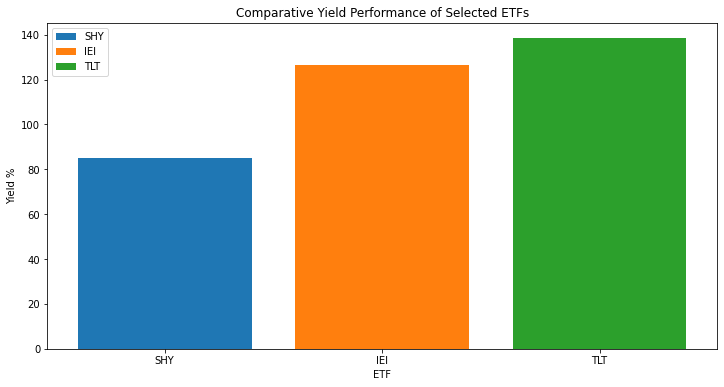

In [51]:
plt.figure(figsize=(12, 6))
for ticker, analysis in yield_performance.items():
    plt.bar(ticker, analysis['Average Price'], label=f'{ticker}')

plt.title('Comparative Yield Performance of Selected ETFs')
plt.xlabel('ETF')
plt.ylabel('Yield %')
plt.legend()
plt.show()


In [42]:
initial_investment = 10000  # Example total investment amount
allocation = initial_investment / len(bond_etf_tickers)  # Even allocation

# Calculate the number of shares to buy for each ETF
etf_shares = {ticker: allocation / bond_etf_data[ticker]['Close'].iloc[0] for ticker in bond_etf_tickers}
print("Allocations:", allocations)


Allocations: {'SHY': 39.858106454703965, 'IEI': 27.419045337673456, 'TLT': 27.2888521628641}


In [43]:
# Create a DataFrame to track portfolio value and dividends
portfolio = pd.DataFrame(index=bond_etf_data[bond_etf_tickers[0]].index)

for ticker, data in bond_etf_data.items():
    portfolio[f'{ticker}_Value'] = etf_shares[ticker] * data['Close']
    portfolio[f'{ticker}_Dividends'] = etf_shares[ticker] * data['Dividends']

# Calculate total portfolio value and total dividends
portfolio['Total Value'] = portfolio[[f'{ticker}_Value' for ticker in bond_etf_tickers]].sum(axis=1)
portfolio['Total Dividends'] = portfolio[[f'{ticker}_Dividends' for ticker in bond_etf_tickers]].sum(axis=1)

# Simulate reinvestment of dividends at the end of each period (e.g., each month)
reinvested_shares = {ticker: 0 for ticker in bond_etf_tickers}
for date, row in portfolio.iterrows():
    for ticker in bond_etf_tickers:
        reinvestment = row[f'{ticker}_Dividends'] / bond_etf_data[ticker].loc[date, 'Close']
        reinvested_shares[ticker] += reinvestment
        # Update the value with reinvested shares
        portfolio.loc[date, f'{ticker}_Value'] += reinvestment * bond_etf_data[ticker].loc[date, 'Close']

    portfolio.loc[date, 'Total Value'] = portfolio.loc[date, [f'{ticker}_Value' for ticker in bond_etf_tickers]].sum()

# Display the first few rows of the portfolio DataFrame
portfolio.head()


,SHY_Value,SHY_Dividends,IEI_Value,IEI_Dividends,TLT_Value,TLT_Dividends,Total Value,Total Dividends
Date,,,,,,,,
2019-01-02,3333.333333,0.0,3333.333333,0.0,3333.333333,0.0,10000.000000,0.0
2019-01-03,3340.109443,0.0,3352.252542,0.0,3371.264821,0.0,10063.626805,0.0
2019-01-04,3332.934971,0.0,3333.607582,0.0,3332.241754,0.0,9998.784308,0.0
2019-01-07,3330.543278,0.0,3327.026861,0.0,3322.417751,0.0,9979.987890,0.0
2019-01-08,3328.550555,0.0,3320.994847,0.0,3313.685326,0.0,9963.230728,0.0


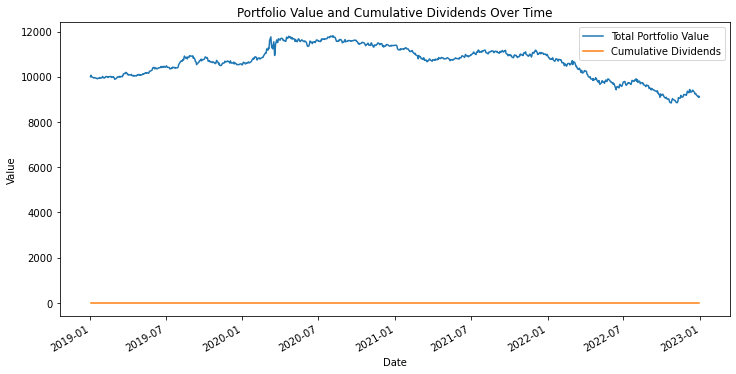

In [44]:
plt.figure(figsize=(12, 6))
portfolio['Total Value'].plot(label='Total Portfolio Value')
portfolio['Total Dividends'].cumsum().plot(label='Cumulative Dividends')
plt.title('Portfolio Value and Cumulative Dividends Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


In [45]:
volatility = {ticker: data['Close'].pct_change().std() * (252**0.5) for ticker, data in bond_etf_data.items()}
print("Annualized Volatility (Interest Rate Risk):")
for ticker, vol in volatility.items():
    print(f"{ticker}: {vol:.2%}")


Annualized Volatility (Interest Rate Risk):
SHY: 1.55%
IEI: 4.09%
TLT: 17.43%


In [46]:
# Credit Risk Assessment for Treasury Bond ETFs
credit_risk = {"SHY": "Low", "IEI": "Low", "TLT": "Low"}
print("Credit Risk Assessment for Treasury Bond ETFs:")
for ticker, risk in credit_risk.items():
    print(f"{ticker}: {risk}")


Credit Risk Assessment for Treasury Bond ETFs:
SHY: Low
IEI: Low
TLT: Low


In [47]:
def calculate_performance_metrics(data):
    total_return = (data['Close'].iloc[-1] - data['Close'].iloc[0]) / data['Close'].iloc[0]
    average_yield = data['Dividends'].sum() / data['Close'].mean()
    return total_return, average_yield

performance_metrics = {ticker: calculate_performance_metrics(data) for ticker, data in bond_etf_data.items()}


In [48]:
print("\nPerformance Metrics:")
for ticker, metrics in performance_metrics.items():
    print(f"{ticker} - Total Return: {metrics[0]:.2%}, Average Yield: {metrics[1]:.2%}")

# Discuss potential adjustments
# Note: This is a placeholder for a real discussion based on the investor's goals and market conditions.
print("\nPotential Adjustments:")
print("Consider rebalancing the portfolio to align with changing risk profiles or yield objectives.")



Performance Metrics:
SHY - Total Return: -2.94%, Average Yield: 0.00%
IEI - Total Return: -5.49%, Average Yield: 0.00%
TLT - Total Return: -18.49%, Average Yield: 0.00%

Potential Adjustments:
Consider rebalancing the portfolio to align with changing risk profiles or yield objectives.
